In [1]:
import pandas as pd
import numpy as np

In [2]:
s = pd.Series([1, 3, 6, np.nan, 44, 2])
print(s)

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     2.0
dtype: float64


In [4]:
dates = pd.date_range('20231215', periods = 6)
print(dates)

DatetimeIndex(['2023-12-15', '2023-12-16', '2023-12-17', '2023-12-18',
               '2023-12-19', '2023-12-20'],
              dtype='datetime64[ns]', freq='D')


In [9]:
df = pd.DataFrame(np.random.randn(6,4), index = dates, columns = ['a', 'b', 'c', 'd'])
print(df)

                   a         b         c         d
2023-12-15 -0.429099 -0.690461  1.572268 -0.670863
2023-12-16 -0.797189  0.065951 -0.503233  0.433399
2023-12-17  0.700127 -0.832926  1.193888 -0.239439
2023-12-18 -0.053006 -0.003827 -1.754899 -0.371093
2023-12-19  1.470912 -1.112401  1.775572  1.395493
2023-12-20  0.679810  0.900237 -0.503292  0.231602


In [10]:
df1 = pd.DataFrame(np.arange(12).reshape((3,4)))
print(df1)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


In [14]:
df2 = pd.DataFrame({
    'A':1.,
    'B':pd.Timestamp('20231215'),
    'C':pd.Series(1, index = list(range(4)), dtype = 'float32'),
    'D':pd.array([3] * 4, dtype='int32'),
    'E':pd.Categorical(["test", "train", "power", "man"]),
    'F':'foo'
})

print(df2)

     A          B    C  D      E    F
0  1.0 2023-12-15  1.0  3   test  foo
1  1.0 2023-12-15  1.0  3  train  foo
2  1.0 2023-12-15  1.0  3  power  foo
3  1.0 2023-12-15  1.0  3    man  foo


In [15]:
df2.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [17]:
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [19]:
df2.values

array([[1.0, Timestamp('2023-12-15 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2023-12-15 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2023-12-15 00:00:00'), 1.0, 3, 'power', 'foo'],
       [1.0, Timestamp('2023-12-15 00:00:00'), 1.0, 3, 'man', 'foo']],
      dtype=object)

In [21]:
df2.describe()  #only consider number

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [22]:
df2.T  #pivot table

,0,1,2,3
A,1.0,1.0,1.0,1.0
B,2023-12-15 00:00:00,2023-12-15 00:00:00,2023-12-15 00:00:00,2023-12-15 00:00:00
C,1.0,1.0,1.0,1.0
D,3,3,3,3
E,test,train,power,man
F,foo,foo,foo,foo


In [23]:
df2.sort_index(axis = 1, ascending = False)

,F,E,D,C,B,A
0,foo,test,3,1.0,2023-12-15,1.0
1,foo,train,3,1.0,2023-12-15,1.0
2,foo,power,3,1.0,2023-12-15,1.0
3,foo,man,3,1.0,2023-12-15,1.0


In [24]:
df2.sort_index(axis = 0, ascending = False)

,A,B,C,D,E,F
3,1.0,2023-12-15,1.0,3,man,foo
2,1.0,2023-12-15,1.0,3,power,foo
1,1.0,2023-12-15,1.0,3,train,foo
0,1.0,2023-12-15,1.0,3,test,foo


In [28]:
df2.sort_values(by = 'E', ascending = False)

,A,B,C,D,E,F
1,1.0,2023-12-15,1.0,3,train,foo
0,1.0,2023-12-15,1.0,3,test,foo
2,1.0,2023-12-15,1.0,3,power,foo
3,1.0,2023-12-15,1.0,3,man,foo


## Select data

In [29]:
dates = pd.date_range('20231215', periods = 6)
df = pd.DataFrame(np.arange(24).reshape((6,4)), index = dates, columns = ['A','B','C','D'])

print(dates)
print(df)

DatetimeIndex(['2023-12-15', '2023-12-16', '2023-12-17', '2023-12-18',
               '2023-12-19', '2023-12-20'],
              dtype='datetime64[ns]', freq='D')
             A   B   C   D
2023-12-15   0   1   2   3
2023-12-16   4   5   6   7
2023-12-17   8   9  10  11
2023-12-18  12  13  14  15
2023-12-19  16  17  18  19
2023-12-20  20  21  22  23


In [31]:
print(df['A'], df.A)

2023-12-15     0
2023-12-16     4
2023-12-17     8
2023-12-18    12
2023-12-19    16
2023-12-20    20
Freq: D, Name: A, dtype: int64 2023-12-15     0
2023-12-16     4
2023-12-17     8
2023-12-18    12
2023-12-19    16
2023-12-20    20
Freq: D, Name: A, dtype: int64


In [32]:
print(df[0:3])  # select by index

            A  B   C   D
2023-12-15  0  1   2   3
2023-12-16  4  5   6   7
2023-12-17  8  9  10  11


In [33]:
print(df['2023-12-15':'2023-12-17'])  # select by keys

            A  B   C   D
2023-12-15  0  1   2   3
2023-12-16  4  5   6   7
2023-12-17  8  9  10  11


In [34]:
print(df.loc['20231215'])  # select by label

A    0
B    1
C    2
D    3
Name: 2023-12-15 00:00:00, dtype: int64


In [36]:
print(df.loc[:, ['A','B']])  #select by label (rows and column)

             A   B
2023-12-15   0   1
2023-12-16   4   5
2023-12-17   8   9
2023-12-18  12  13
2023-12-19  16  17
2023-12-20  20  21


In [37]:
print(df.iloc[3:5, 1:3])   #select by position

             B   C
2023-12-18  13  14
2023-12-19  17  18


In [38]:
print(df.iloc[[1,3,5], 1:3])

             B   C
2023-12-16   5   6
2023-12-18  13  14
2023-12-20  21  22


In [39]:
print(df[df.A > 8])  # select by indexing

             A   B   C   D
2023-12-18  12  13  14  15
2023-12-19  16  17  18  19
2023-12-20  20  21  22  23


In [40]:
df.iloc[2,2] = 111
print(df)

             A   B    C   D
2023-12-15   0   1    2   3
2023-12-16   4   5    6   7
2023-12-17   8   9  111  11
2023-12-18  12  13   14  15
2023-12-19  16  17   18  19
2023-12-20  20  21   22  23


In [42]:
df.A[df.A > 4] = 0  # set column A's value to zero when A > 4
print(df)

            A   B    C   D
2023-12-15  0   1    2   3
2023-12-16  4   5    6   7
2023-12-17  0   9  111  11
2023-12-18  0  13   14  15
2023-12-19  0  17   18  19
2023-12-20  0  21   22  23


In [48]:
df['E'] = np.random.random(6)
print(df)

            A   B    C   D         E
2023-12-15  0   1    2   3  0.811844
2023-12-16  4   5    6   7  0.941681
2023-12-17  0   9  111  11  0.775118
2023-12-18  0  13   14  15  0.965151
2023-12-19  0  17   18  19  0.173785
2023-12-20  0  21   22  23  0.063018


## Non-value

In [49]:
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
print(df)

            A     B      C   D         E
2023-12-15  0   NaN    2.0   3  0.811844
2023-12-16  4   5.0    NaN   7  0.941681
2023-12-17  0   9.0  111.0  11  0.775118
2023-12-18  0  13.0   14.0  15  0.965151
2023-12-19  0  17.0   18.0  19  0.173785
2023-12-20  0  21.0   22.0  23  0.063018


In [50]:
print(df.dropna(axis = 0, how = 'any'))   # how could be "any", 'All'

            A     B      C   D         E
2023-12-17  0   9.0  111.0  11  0.775118
2023-12-18  0  13.0   14.0  15  0.965151
2023-12-19  0  17.0   18.0  19  0.173785
2023-12-20  0  21.0   22.0  23  0.063018


In [51]:
print(df.dropna(axis = 1, how = 'any'))   

            A   D         E
2023-12-15  0   3  0.811844
2023-12-16  4   7  0.941681
2023-12-17  0  11  0.775118
2023-12-18  0  15  0.965151
2023-12-19  0  19  0.173785
2023-12-20  0  23  0.063018


In [52]:
print(df.fillna(value = 0))   set non-value to zero

            A     B      C   D         E
2023-12-15  0   0.0    2.0   3  0.811844
2023-12-16  4   5.0    0.0   7  0.941681
2023-12-17  0   9.0  111.0  11  0.775118
2023-12-18  0  13.0   14.0  15  0.965151
2023-12-19  0  17.0   18.0  19  0.173785
2023-12-20  0  21.0   22.0  23  0.063018


In [53]:
print(df.isnull())

                A      B      C      D      E
2023-12-15  False   True  False  False  False
2023-12-16  False  False   True  False  False
2023-12-17  False  False  False  False  False
2023-12-18  False  False  False  False  False
2023-12-19  False  False  False  False  False
2023-12-20  False  False  False  False  False


In [54]:
print(np.any(df.isnull()) == True)

True


## Combine DateFrame

In [56]:
df1 = pd.DataFrame(np.ones((3,4))*0, columns = ['A','B','C','D'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns = ['A','B','C','D'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns = ['A','B','C','D'])

print(df1)
print(df2)
print(df3)

     A    B    C    D
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
     A    B    C    D
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
     A    B    C    D
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


In [59]:
# concatenating
# method 1
res = pd.concat([df1, df2, df3], axis = 0, ignore_index = True)
print(res)

     A    B    C    D
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


In [63]:
#join ('inner', 'outer')
df1 = pd.DataFrame(np.ones((3,4))*0, columns = ['A','B','C','D'], index = [1, 2, 3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns = ['B','C','D','E'], index = [2, 3, 4])

print(df1)
print(df2)

     A    B    C    D
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
     B    C    D    E
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0


In [64]:
res = pd.concat([df1, df2], join = 'outer')  #default outer join
print(res)

     A    B    C    D    E
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  0.0  0.0  0.0  0.0  NaN
2  NaN  1.0  1.0  1.0  1.0
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0


In [66]:
res = pd.concat([df1, df2], join = 'inner', ignore_index = True)  # like SQL join
print(res)

     B    C    D
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
5  1.0  1.0  1.0


In [72]:
res = pd.concat([df1, df2], axis = 1).reindex(df1.index)  #.reindex(df1.index) like left join in SQL

print(res)

     A    B    C    D    B    C    D    E
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0


## Merge dataframe

In [76]:
left = pd.DataFrame({
    'key':['K0','K1','K3','K4'],
    'A':['A0','A1','A2','A3'],
    'B':['B0','B1','B2','B3']
})

right = pd.DataFrame({
    'key':['K0','K1','K3','K4'],
    'C':['C0','C1','C2','C3'],
    'D':['D0','D1','D2','D3']
})

print(left)
print(right)

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K3  A2  B2
3  K4  A3  B3
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K3  C2  D2
3  K4  C3  D3


In [78]:
res = pd.merge(left, right, on = 'key')
print(res)

  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K3  A2  B2  C2  D2
3  K4  A3  B3  C3  D3


In [85]:
left = pd.DataFrame({
    'key1':['K0','K1','K2','K3'],
    'A':['A0','A1','A2','A3'],
    'B':['B0','B1','B2','B3']
})

right = pd.DataFrame({
    'key2':['K0','K1','K3','K5'],
    'C':['C0','C1','C2','C3'],
    'D':['D0','D1','D2','D3']
})

res = pd.merge(left, right, left_on='key1', right_on='key2', how = 'left', indicator = True)
print(res)

  key1   A   B key2    C    D     _merge
0   K0  A0  B0   K0   C0   D0       both
1   K1  A1  B1   K1   C1   D1       both
2   K2  A2  B2  NaN  NaN  NaN  left_only
3   K3  A3  B3   K3   C2   D2       both


## matplotlib plots

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
#Series
data = pd.Series(np.random.randn(1000), index = np.arange(1000))
data = data.cumsum()

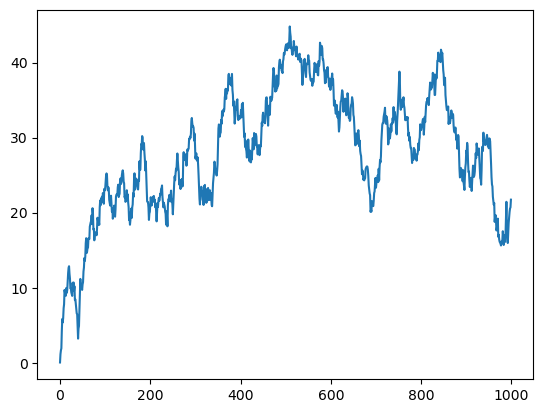

In [88]:
data.plot()
plt.show()

In [92]:
# DataFrame
data = pd.DataFrame(np.random.randn(1000, 4), index = np.arange(1000), columns = list('ABCD'))

data = data.cumsum()

print(data)

            A          B         C          D
0   -0.710732   0.368846  1.116096  -0.219914
1    1.342708   0.891153  1.819150   1.123315
2    1.477032   1.377951  1.022767   0.197355
3    2.544798   0.193663  1.890024  -2.034162
4    2.219688  -0.275659  3.634022  -1.956690
..        ...        ...       ...        ...
995  0.145422 -20.482766  3.032463 -46.266650
996  0.456600 -20.542929  3.041873 -44.645047
997 -1.059034 -21.083224  3.319581 -45.961868
998 -0.577453 -20.475400  3.779337 -47.545025
999 -0.526980 -19.749150  3.900930 -44.350891

[1000 rows x 4 columns]


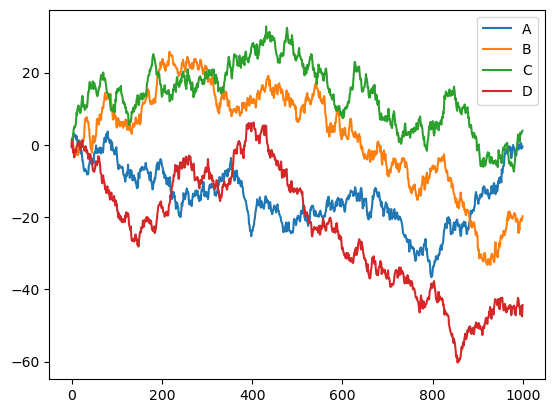

In [93]:
data.plot()
plt.show()